There are 5152 ones in the labels.
Epoch 1/3


2024-05-06 14:01:07.677372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-06 14:01:08.137123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-06 14:01:08.153931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-06 14:01:08.443960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-06 14:01:08.460419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-06 14:01:08.783633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-06 14:01:08.808898: I tensorflow/core/grappler/optimizers/cust

13/13 [==============================] - ETA: 0s - loss: 0.2219 - accuracy: 0.9744 - precision_2: 0.9744 - recall_2: 0.9744 - F1Score: 0.9760

2024-05-06 14:01:11.376694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-06 14:01:11.538987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-06 14:01:11.552115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-06 14:01:11.630420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-06 14:01:11.643132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 7s 204ms/step - loss: 0.2219 - accuracy: 0.9744 - precision_2: 0.9744 - recall_2: 0.9744 - F1Score: 0.9760 - val_loss: 0.0291 - val_accuracy: 1.0000 - val_precision_2: 1.0000 - val_recall_2: 1.0000 - val_F1Score: 1.0000
Epoch 2/3
13/13 [==============================] - 1s 71ms/step - loss: 0.1189 - accuracy: 0.9923 - precision_2: 0.9923 - recall_2: 0.9923 - F1Score: 0.9928 - val_loss: 0.0116 - val_accuracy: 1.0000 - val_precision_2: 1.0000 - val_recall_2: 1.0000 - val_F1Score: 1.0000
Epoch 3/3
4/4 [==============================] - 1s 172ms/step - loss: 0.0135 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000 - F1Score: 1.0000
Test Loss: 0.0135
Test Accuracy: 100.00%
Test Precision: 100.00%
Test Recall: 100.00%
Test F1 Score: 1.0000


2024-05-06 14:01:14.968172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-06 14:01:15.095164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-06 14:01:15.107512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 35ms/step


2024-05-06 14:01:15.191196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-06 14:01:15.204655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



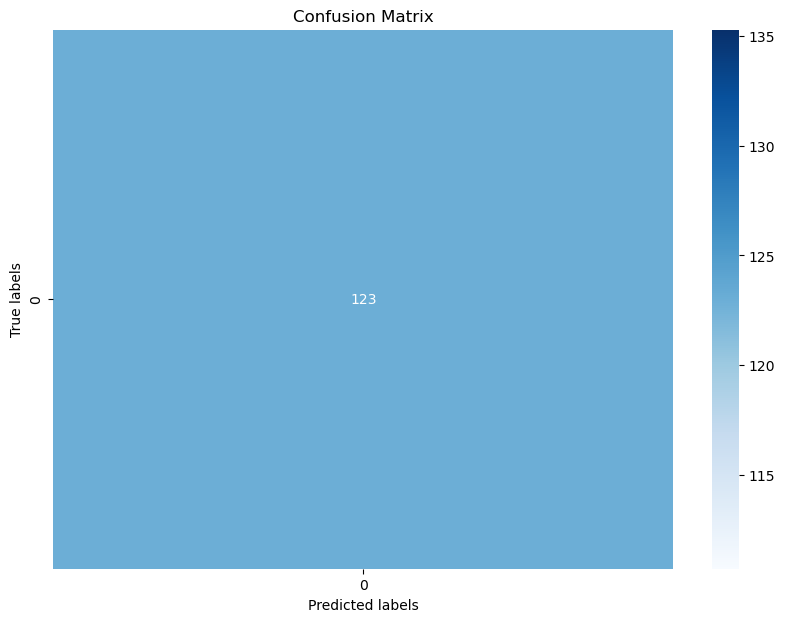

In [7]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Input
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import backend as K

tracks_df = pd.read_csv('Data/29_tracks.csv')
tracks_meta_df = pd.read_csv('Data/28_tracksMeta.csv')

tracks_df = tracks_df[tracks_df['trackId'] != 47]
tracks_meta_df = tracks_meta_df[tracks_meta_df['trackId'] != 47]


# df = pd.read_excel('Data/Book1.xlsx')
# df.to_csv('Data/Book1.csv', index=False)

# LABELING

book1_df = pd.read_csv('Data/Book1.csv')

book1_df['trackId'] = book1_df['trackId'].astype(str)

tracks_df['stop_before_pedestrian'] = 0

for idx, row in book1_df.iterrows():
    track_ids = [int(id.strip()) for id in row['trackId'].split(', ') if id.strip()]
    
    initial_frame, ending_frame = row['initial_frame'], row['ending_frame']
    
    tracks_df.loc[(tracks_df['frame'].between(initial_frame, ending_frame)) & (tracks_df['trackId'].isin(track_ids)), 'stop_before_pedestrian'] = 1
# LEARNING


labels = tracks_df['stop_before_pedestrian']
num_ones = np.count_nonzero(labels == 1)
print(f"There are {num_ones} ones in the labels.")


grouped = tracks_df.groupby('trackId')
sequences = [group.drop('trackId', axis=1).values for _, group in grouped]

max_sequence_length = max(len(s) for s in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', dtype='float32')

# Convert labels to one-hot encoded format
labels = np.array([group['stop_before_pedestrian'].iloc[0] for _, group in grouped])
one_hot_labels = to_categorical(labels, num_classes=2)

max_sequence_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, truncating='post', padding='post', dtype='float32')

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)


model = tf.keras.Sequential([
    Input(shape=(max_sequence_length, feature_dim)),
    Bidirectional(LSTM(50, return_sequences=True, dropout=0.2)),
    Bidirectional(LSTM(30, dropout=0.2)),
    Dense(2, activation='softmax')
])

def F1Score(y_true, y_pred):
    # Calculating Precision
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    # Calculating Recall
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    # Calculating F1 Score
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), F1Score])

class_weights = {0: 1, 1: 3}

history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2, class_weight=class_weights)



loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Precision: {precision*100:.2f}%")
print(f"Test Recall: {recall*100:.2f}%")
print(f"Test F1 Score: {f1_score:.4f}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes))

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()